In [44]:
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,5.0)
# plt.rcParams["figure.titlesize"] = 2 # this is only for plt.suptitle
plt.rcParams["font.size"] = 12 # global default text size for all text elements

plt.rcParams["axes.titlesize"] = 12 # control title size
plt.rcParams["axes.labelsize"] = 12 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 12 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 12 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 10 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines


# plt.rcParams["lines.linewidth"] = 0.7
# plt.rcParams["lines.markeredgewidth"] = 0.7
# plt.rcParams["lines.markersize"] = 4

plt.rcParams["grid.linestyle"] = "--"
# plt.rcParams["grid.linewidth"] = 0.7
# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

plt.rcParams["lines.markersize"] = 6

In [45]:
import numpy as np

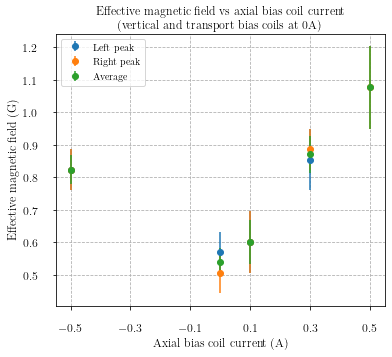

In [46]:
### First (leftmost) plot, where axial bias coil is varied

current_axial_biascoil = [0,-0.5,0.1,0.3,0.5]
axial_left_peak_freq_separation_from_centre = [i * 133/2100 for i in [9,13,9.5,13.5,np.nan]] #133kHz per point (e.g. 9 means 9*133kHz)
axial_right_peak_freq_separation_from_centre = [i * 133/2100 for i in [8,13,9.5,14,17]] #133kHz per point (e.g. 9 means 9*133kHz)
axial_left_peak_freq_separation_from_centre_error = [i * 133/2100 for i in [1.0,1.0,1.5,1.5,1.0]] #error bar where one data point is +-133kHz
axial_right_peak_freq_separation_from_centre_error = [i * 133/2100 for i in [1.0,1.0,1.5,1.0,2.0]] #error bar where one data point is +-133kHz
axial_average_peak_freq_separation_from_centre = [(i+j)/2 for i,j in zip(axial_left_peak_freq_separation_from_centre,axial_right_peak_freq_separation_from_centre)][:-1] + [axial_right_peak_freq_separation_from_centre[-1]] #average of left and right peak
axial_average_peak_freq_separation_from_centre_error = [np.sqrt(i**2+j**2)/2 for i,j in zip(axial_left_peak_freq_separation_from_centre_error,axial_right_peak_freq_separation_from_centre_error)][:-1] + [axial_right_peak_freq_separation_from_centre_error[-1]] #error of average of left and right peak

# fig, ax = plt.subplots(1,1,figsize=(8,6))
plt.errorbar(current_axial_biascoil, axial_left_peak_freq_separation_from_centre, yerr=axial_left_peak_freq_separation_from_centre_error, fmt='o', label='Left peak')
plt.errorbar(current_axial_biascoil, axial_right_peak_freq_separation_from_centre, yerr=axial_right_peak_freq_separation_from_centre_error, fmt='o', label='Right peak')
plt.errorbar(current_axial_biascoil, axial_average_peak_freq_separation_from_centre, yerr=axial_average_peak_freq_separation_from_centre_error, fmt='o', label='Average')
plt.xlabel('Axial bias coil current (A)')
plt.ylabel('Effective magnetic field (G)')
plt.title('Effective magnetic field vs axial bias coil current \n (vertical and transport bias coils at 0A)')
plt.xticks(np.linspace(-0.5,0.5,6))
plt.legend()
plt.grid()
plt.savefig('test_effective_magnetic_field_vs_axial_biascoil_current.pdf', dpi=300)